In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## drop unneccesary columns
df_index.drop(columns = ['Unnamed: 0','year','month'], axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

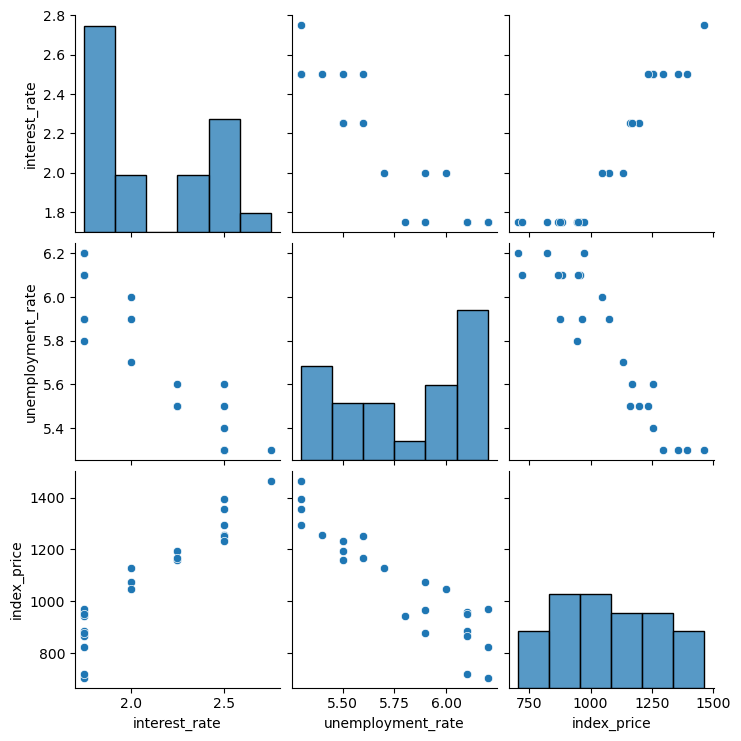

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


interest_rate increasing unemployment_rate is decresing
interest_rate increasing index_price keep on incresing
index_price increasing unemployment_rate is decresing

Text(0, 0.5, 'unemployment rate')

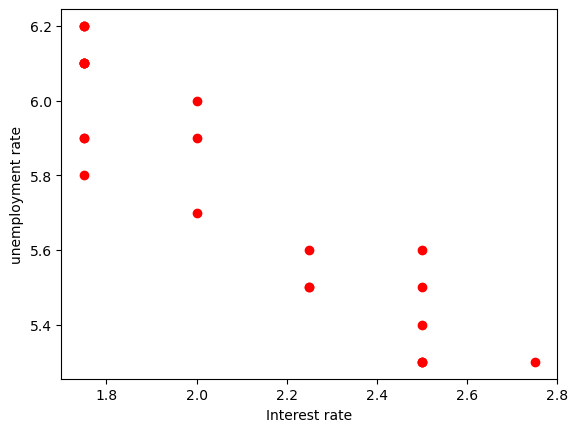

In [9]:
## Visualise the datapoints more closly
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [10]:
## independent and dependent features

X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

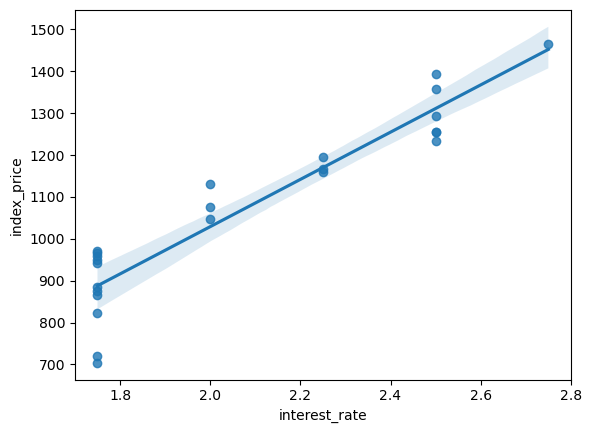

In [14]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

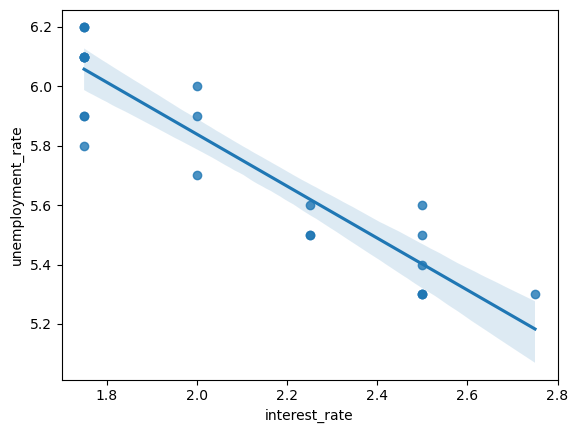

In [15]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

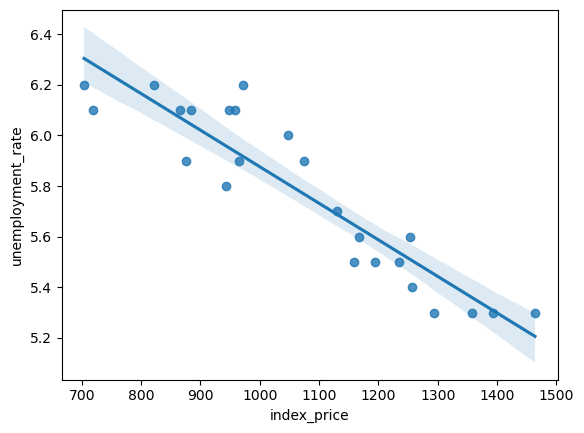

In [16]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [21]:
X_test

array([[ 0.55339859, -0.84858687],
       [-0.9486833 ,  1.36439457],
       [ 2.05548048, -1.48086727],
       [-0.9486833 ,  1.04825436],
       [-0.19764235,  0.41597395]])

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train, scoring='neg_mean_squared_error',
               cv=3)

In [25]:
# validation_score
np.mean(validation_score)

-5674.031667186767

In [26]:
## prediction
y_pred = regression.predict(X_test)

In [27]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [28]:
## Performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258842
71.71878409976628
83.40926389351989


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R^2: ",score)
## display adjusted R-squared
adj_rsqr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adj_rsqr",adj_rsqr)

R^2:  0.8254940547158574
adj_rsqr 0.6509881094317147


## Assumption

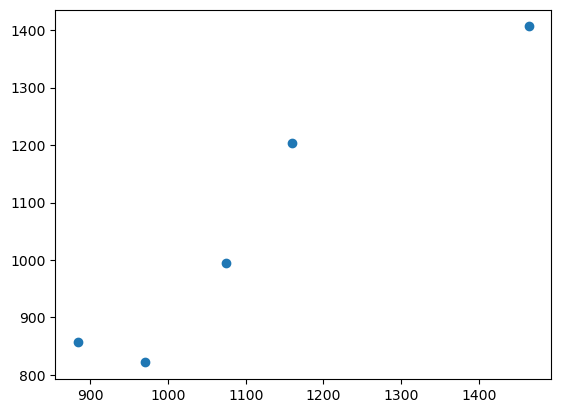

In [31]:
plt.scatter(y_test,y_pred)

between y_test and y_pred linear regression is there then our model performing well


In [32]:
residuals = y_test - y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


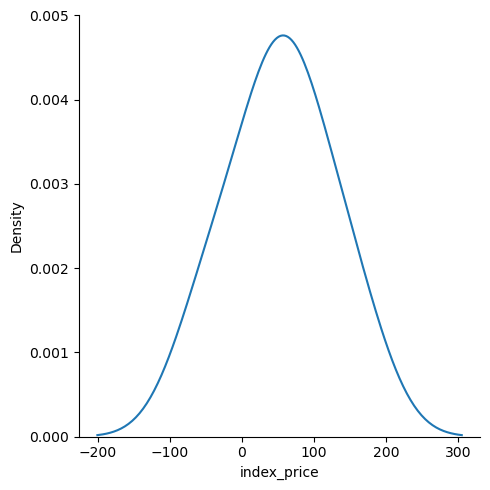

In [33]:
## plot residuals
sns.displot(residuals,kind='kde')

Data normaly distributed means our model performing well

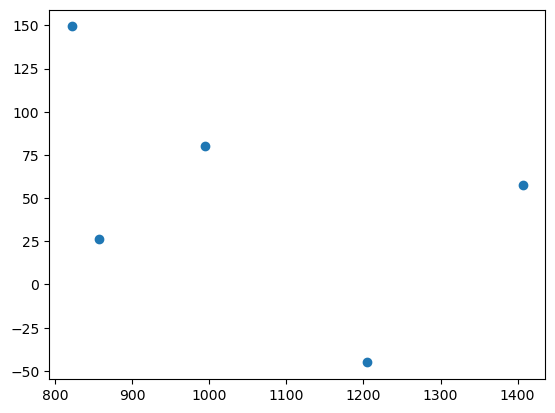

In [34]:
## scatter plot with respect to residuals and preiction
plt.scatter(y_pred, residuals)

Data is unifomly distributed

In [35]:
## OLS linear Regression
import statsmodels.api as sm

In [36]:
model = sm.OLS(y_train,X_train).fit()

In [37]:
model.summary()

C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Sat, 27 Jan 2024   Prob (F-statistic):                       0.751
Time:                        11:59:12   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(regression.coef_)

[  86.63351334 -114.04857249]
